In [ ]:
!pip install -r requirements.txt

In [1]:
import cv2
import supervision as sv
from ultralytics import YOLO
from jupyter_bbox_widget import BBoxWidget
from IPython.display import display

In [37]:
image = cv2.imread("/home/clayton/dev/images_recon/motociclista2.jpg")
model = YOLO('yolov8s.pt')
result = model(image)[0]
detections = sv.Detections.from_ultralytics(result)


0: 288x640 1 person, 5 cars, 1 motorcycle, 206.4ms
Speed: 4.5ms preprocess, 206.4ms inference, 4.7ms postprocess per image at shape (1, 3, 288, 640)


In [38]:
len(detections)

7

In [39]:
bounding_box_annotator = sv.BoundingBoxAnnotator()
annotated_frame = bounding_box_annotator.annotate(
    scene=image.copy(),
    detections=detections
)

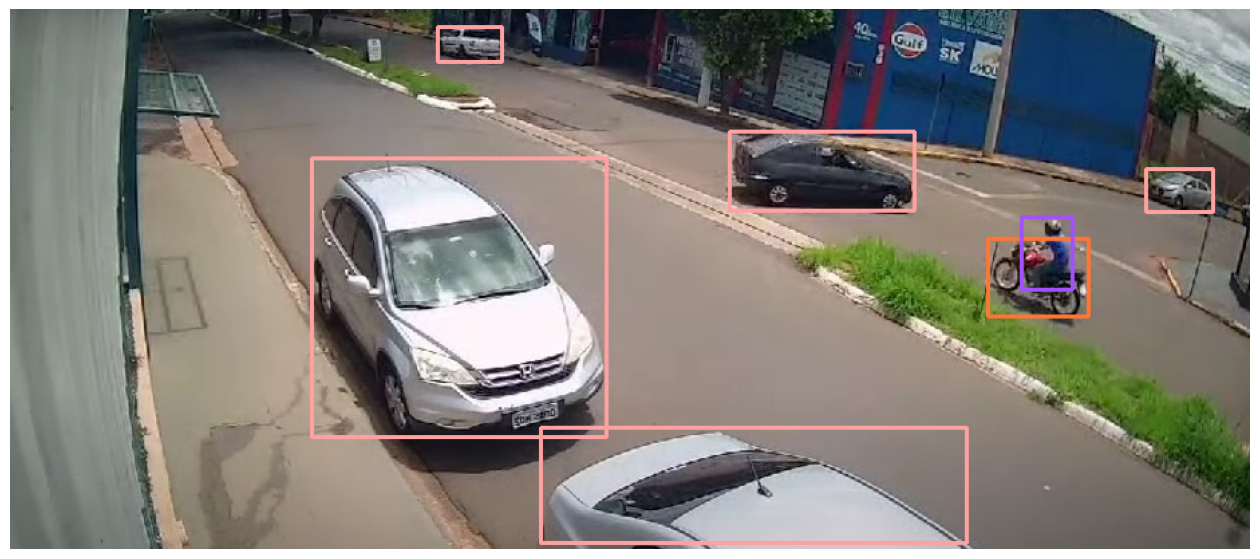

In [5]:
sv.plot_image(annotated_frame, (16, 16))

In [22]:
corner_annotator = sv.BoxCornerAnnotator()
annotated_frame = corner_annotator.annotate(
    scene=image.copy(),
    detections=detections
)

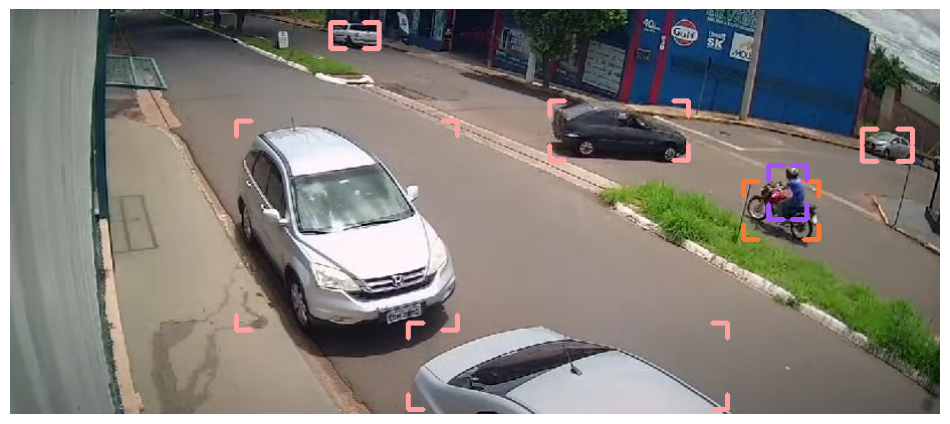

In [23]:
sv.plot_image(annotated_frame)

In [8]:
labels = [
    f"{class_name} {confidence:.2f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)
annotated_frame = label_annotator.annotate(
    scene=image.copy(),
    detections=detections,
    labels=labels
)

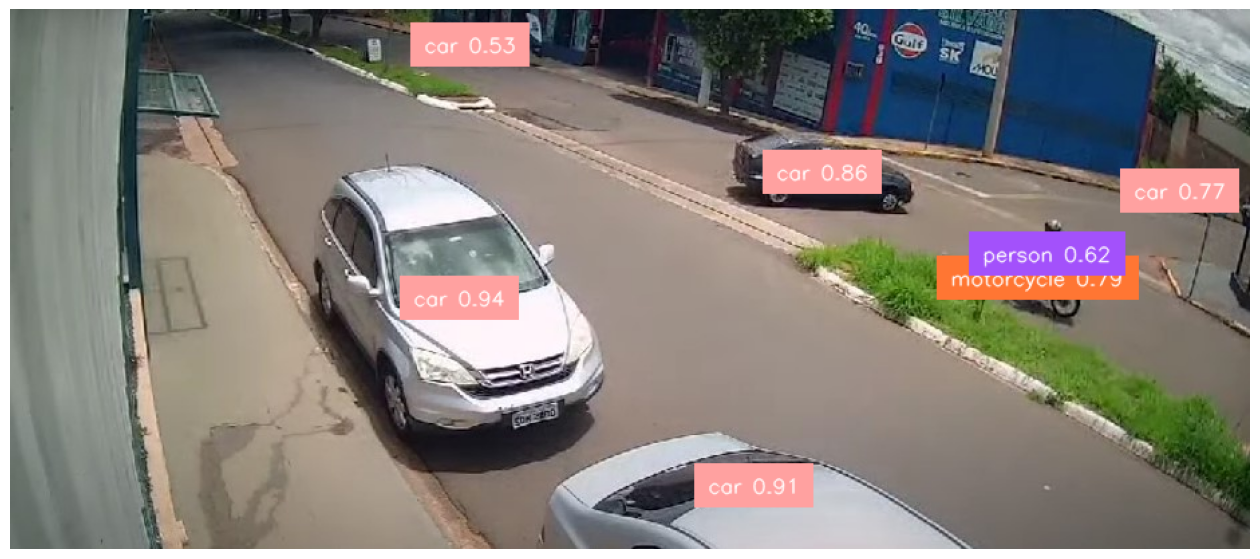

In [9]:
sv.plot_image(annotated_frame, (16, 16))

In [10]:
color_annotator = sv.ColorAnnotator()
annotated_frame = color_annotator.annotate(
    scene=image.copy(),
    detections=detections
)

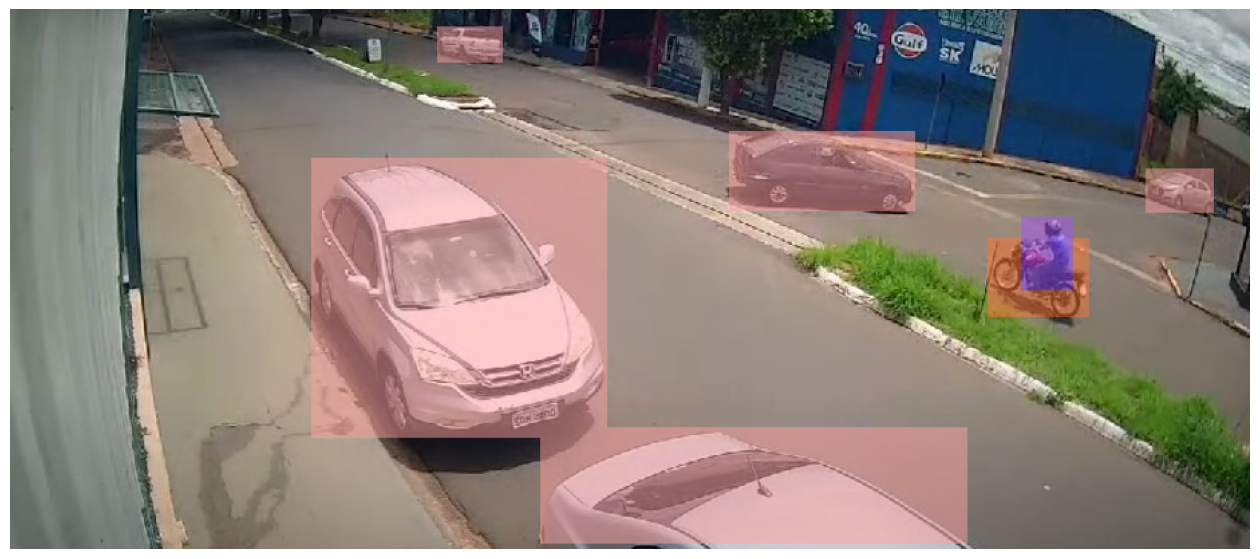

In [11]:
sv.plot_image(annotated_frame, (16, 16))

In [31]:
polygon_annotator = sv.PolygonAnnotator()
mask_annotator = sv.MaskAnnotator()
annotated_image = mask_annotator.annotate(image.copy(), detections=detections)
annotated_frame = polygon_annotator.annotate(
    annotated_image,
    detections=detections
)

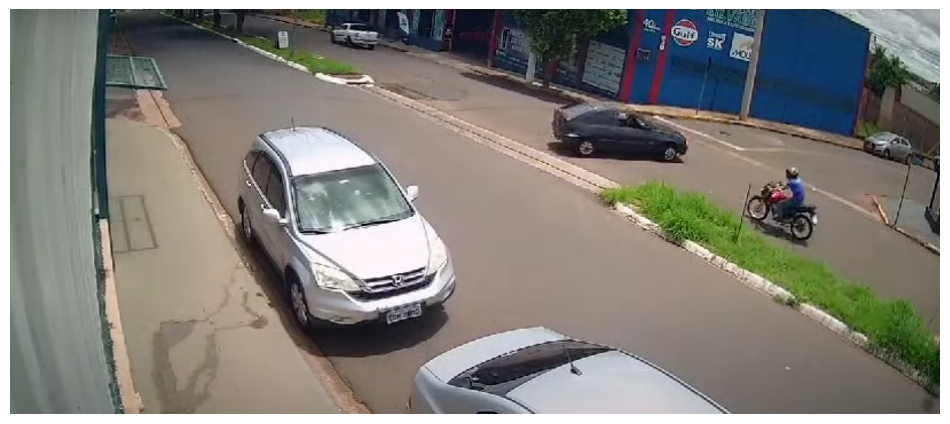

In [32]:
sv.plot_image(annotated_frame)

In [42]:
image_key = cv2.imread("/home/clayton/dev/images_recon/motociclista.jpg")
model = YOLO('yolov8s-pose.pt')
result_key = model(image_key)[0]
key_points = sv.KeyPoints.from_ultralytics(result_key)

100%|█████████| 22.4M/22.4M [00:01<00:00, 14.9MB/s]



0: 512x640 1 person, 344.9ms
Speed: 2.5ms preprocess, 344.9ms inference, 6.9ms postprocess per image at shape (1, 3, 512, 640)


In [47]:
vertex_annotator = sv.VertexAnnotator(
    color=sv.Color.GREEN,
    radius=2
)
annotated_frame = vertex_annotator.annotate(
    scene=image_key.copy(),
    key_points=key_points
)

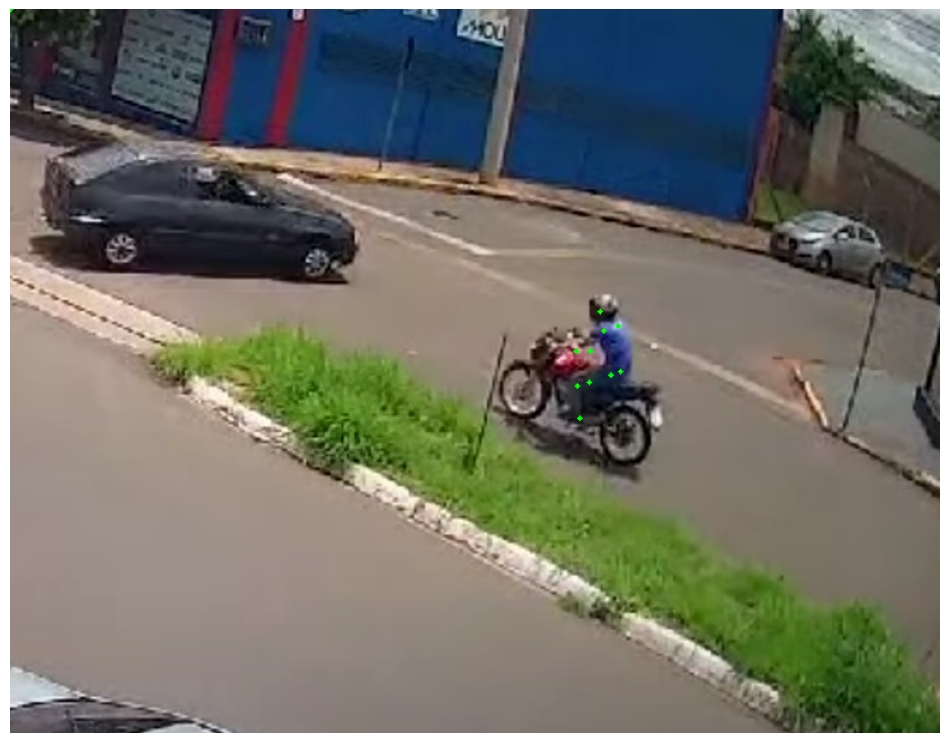

In [48]:
sv.plot_image(annotated_frame)

In [51]:
edge_annotator = sv.EdgeAnnotator(
    color=sv.Color.GREEN,
    thickness=2
)
annotated_frame = edge_annotator.annotate(
    scene=image_key.copy(),
    key_points=key_points
)

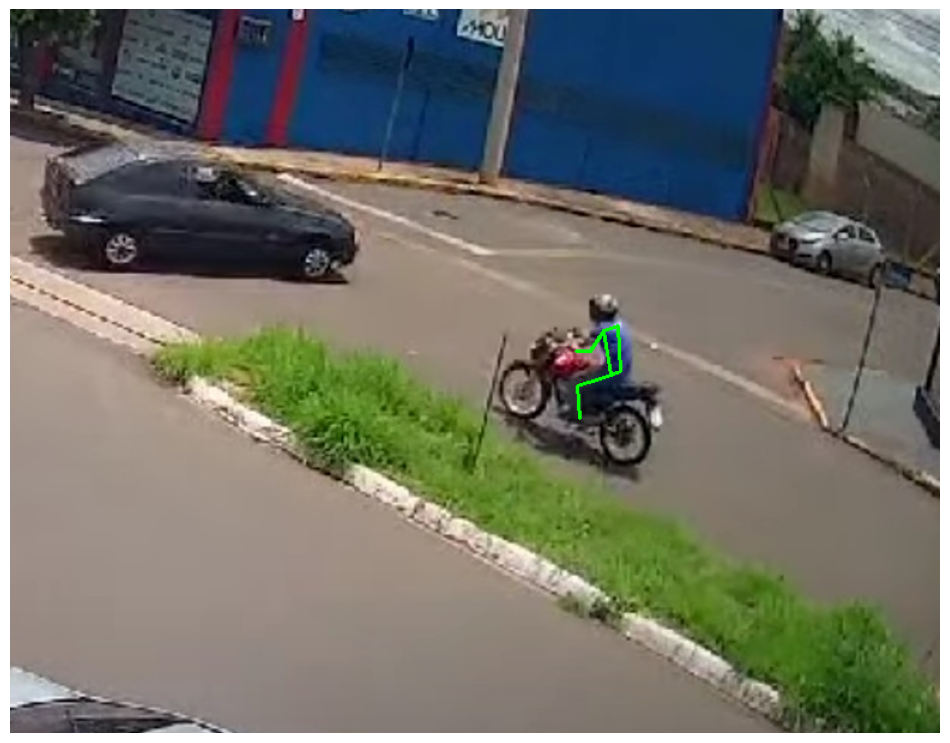

In [53]:
sv.plot_image(annotated_frame)

In [55]:
print(key_points)

KeyPoints(xy=array([[[          0,           0],
        [          0,           0],
        [          0,           0],
        [     492.63,      252.82],
        [          0,           0],
        [     495.39,      268.54],
        [     507.23,      264.25],
        [        485,      285.95],
        [          0,           0],
        [     472.74,      285.49],
        [          0,           0],
        [     501.16,      305.45],
        [     509.83,       302.3],
        [     473.85,      314.36],
        [     483.16,      311.14],
        [     475.58,      341.46],
        [          0,           0]]], dtype=float32), class_id=array([0]), confidence=array([[    0.24346,     0.31413,    0.044538,     0.81206,    0.081237,     0.97466,     0.85576,      0.9335,     0.37015,     0.77281,     0.25711,     0.95616,     0.88606,     0.84757,     0.62445,     0.63754,     0.41943]], dtype=float32), data={'class_name': array(['person'], dtype='<U6')})





LABELS = [
    "nose", "left eye", "right eye", "left ear",
    "right ear", "left shoulder", "right shoulder", "left elbow",
    "right elbow", "left wrist", "right wrist", "left hip",
    "right hip", "left knee", "right knee", "left ankle",
    "right ankle"
]